### CS516 Medical Imaging
### Final Project Part 1
#### Luyun Nie 002268087
#### Junjia Lin 002268506

In [1]:
import os
from nipype.interfaces import fsl
import nibabel as nib
from skimage.filters import threshold_otsu
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# define a function transform the t1 to t2
def t1tot2(path):
    # transform the t1 to t2
    flt12 = fsl.FLIRT(out_matrix_file = str(path)+'/t1_to_t2.mat',out_file = str(path)+'/t1_to_t2.nii.gz')
    flt12.inputs.in_file = str(path)+'/t1.nii.gz'
    flt12.inputs.reference = str(path)+'/t2.nii.gz'
    flt12.inputs.output_type = "NIFTI_GZ"
    flt12.run()

In [3]:
# scan the root file
go = os.walk(r"/Volumes/myDisk/final") 

In [4]:
# exceed the transformation in each sub file
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        t1tot2(os.path.join(path,dir_name))

In [5]:
# transform the t1 what has transformed to t2 to tof
def t1tot2totof(path):
    # transform the t1_to_t2 to tof
    flt12 = fsl.FLIRT(out_matrix_file = str(path)+'/t1_to_t2_to_tof.mat',out_file = str(path)+'/t1_to_t2_to_tof.nii.gz')
    flt12.inputs.in_file = str(path)+'/t1_to_t2.nii.gz'
    flt12.inputs.reference = str(path)+'/tof.nii.gz'
    flt12.inputs.output_type = "NIFTI_GZ"
    flt12.run()

In [6]:
# exceed the tranformation in each sub file
go = os.walk(r"/Volumes/myDisk/final") 
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        t1tot2totof(os.path.join(path,dir_name))

In [7]:
# define a function plotting the results
def plott1tot2tot1f(path):
    img = nib.load(str(path)+'/t1_to_t2_to_tof.nii.gz')
    imgdata = img.get_data()
    i,j,k = imgdata.shape
    plt.imshow(np.max(imgdata[:,:,:],axis = 2))

<ipython-input-7-e3c56a3d81e5>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  imgdata = img.get_data()


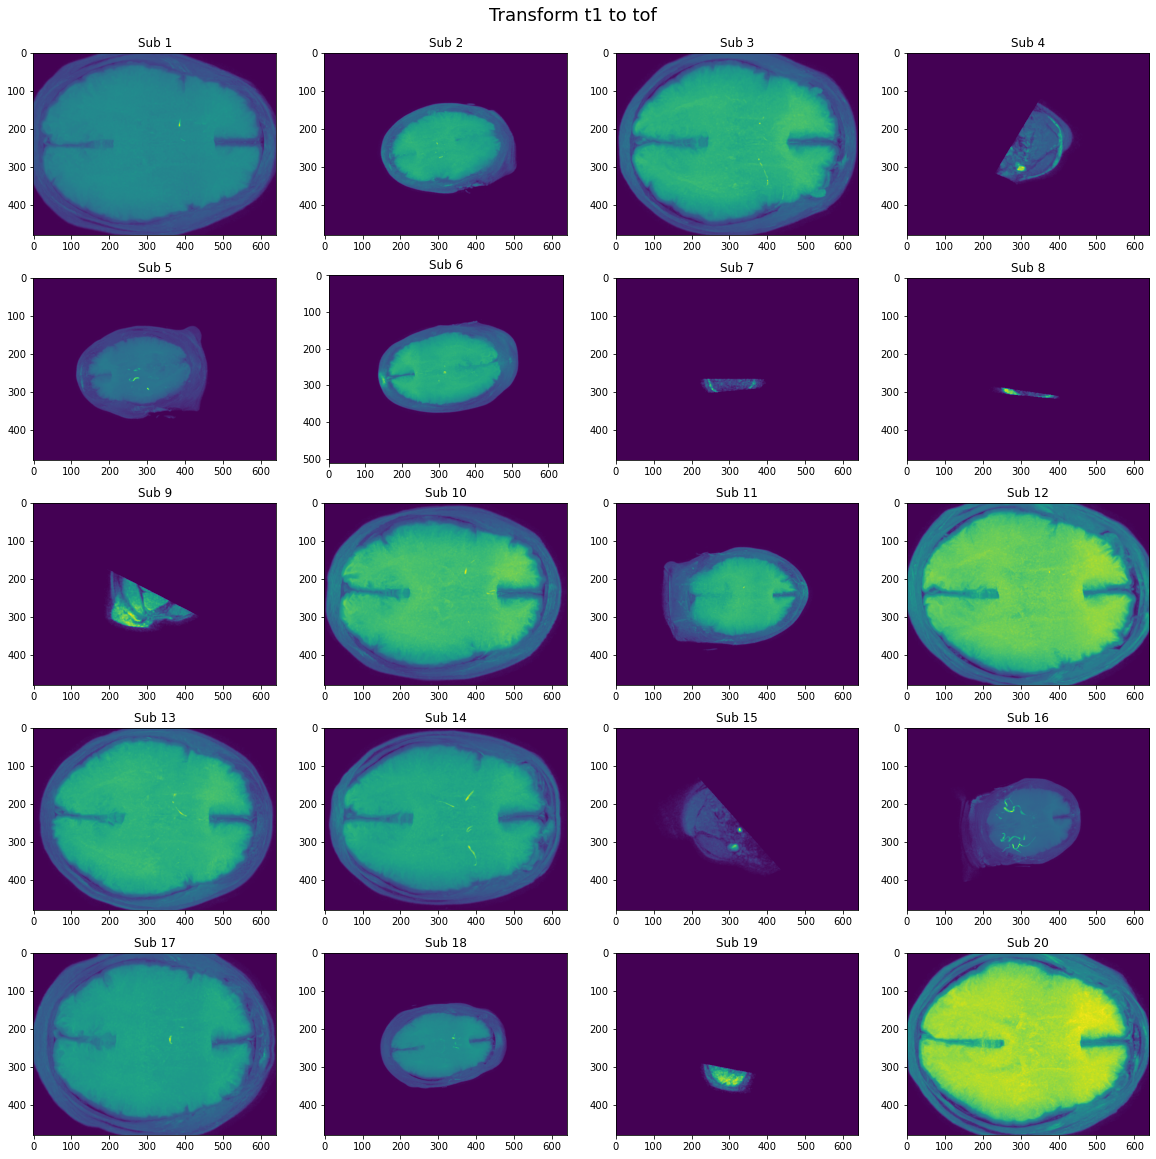

In [8]:
# plot the transformations
import os
go = os.walk(r"/Volumes/myDisk/final") 
plt.figure(figsize = (20,20))
plt.suptitle('Transform t1 to tof',fontsize = 18, y=0.91)
plt.tight_layout()
m = 1
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        plt.subplot(5,4,m)
        plott1tot2tot1f(os.path.join(path,dir_name))
        plt.title("Sub {}".format(m))
        m = m+1

Note: As the figures shown above, we easily known that because of the difference intensities, some of the t1 image cannot directly transform to tof. Thus, we came out an idea that a threshold should be applied to the tof to average the tof image.

In [25]:
# threshold the sub-02 tof image
path2 = r"/Volumes/myDisk/final/sub-02"
thresh = fsl.Threshold(direction = 'above',out_file = str(path2)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path2)+'/tof.nii.gz'
thresh.inputs.thresh = 130
thresh.run()

In [26]:
# transform the sub-02 t1_to_t2_to_tof image
flt2f = fsl.FLIRT(out_matrix_file = str(path2)+'/t1_to_t2_to_tof.mat',out_file = str(path2)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path2)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path2)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-28-b6023e29c890>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path2)+'/t1_to_t2_to_tof.nii.gz').get_data()


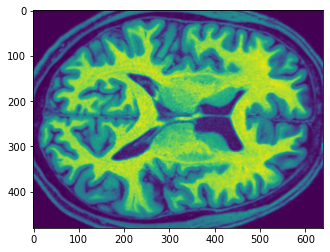

In [28]:
# load the image and show
img = nib.load(str(path2)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

Note: We built the tof image's histogram bins to analyze its intensity. We found that the correct threshold value was always beween the 24th and 40th bins in the histogram. Such that, we guess each tof image's threshold and guess, which cost us a lot of time.

In [31]:
# same as sub-02
path3 = r"/Volumes/myDisk/final/sub-03"
thresh = fsl.Threshold(direction = 'above',out_file = str(path3)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path3)+'/tof.nii.gz'
thresh.inputs.thresh = 202.5
thresh.run()

In [32]:
flt2f = fsl.FLIRT(out_matrix_file = str(path3)+'/t1_to_t2_to_tof.mat',out_file = str(path3)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path3)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path3)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-34-99aa9fa7a799>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path3)+'/t1_to_t2_to_tof.nii.gz').get_data()


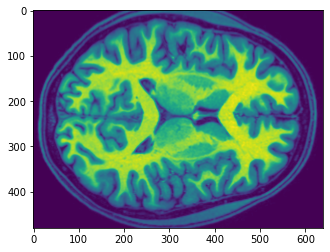

In [34]:
img = nib.load(str(path3)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [35]:
# same as sub-02
path4 = r"/Volumes/myDisk/final/sub-04"
thresh = fsl.Threshold(direction = 'above',out_file = str(path4)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path4)+'/tof.nii.gz'
thresh.inputs.thresh = 202
thresh.run()

In [36]:
flt2f = fsl.FLIRT(out_matrix_file = str(path4)+'/t1_to_t2_to_tof.mat',out_file = str(path4)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path4)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path4)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-37-048fdeeaf531>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path4)+'/t1_to_t2_to_tof.nii.gz').get_data()


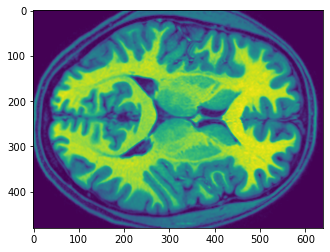

In [37]:
img = nib.load(str(path4)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [38]:
# same as sub-02
path5 = r"/Volumes/myDisk/final/sub-05"
thresh = fsl.Threshold(direction = 'above',out_file = str(path5)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path5)+'/tof.nii.gz'
thresh.inputs.thresh = 180
thresh.run()

In [39]:
flt2f = fsl.FLIRT(out_matrix_file = str(path5)+'/t1_to_t2_to_tof.mat',out_file = str(path5)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path5)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path5)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-40-89f7a810b28e>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path5)+'/t1_to_t2_to_tof.nii.gz').get_data()


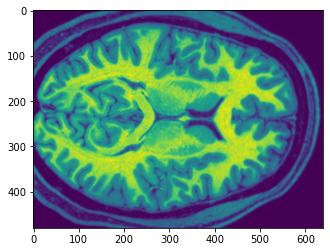

In [40]:
img = nib.load(str(path5)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [43]:
# same as sub-02
path6 = r"/Volumes/myDisk/final/sub-06"
thresh = fsl.Threshold(direction = 'above',out_file = str(path6)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path6)+'/tof.nii.gz'
thresh.inputs.thresh = 220
thresh.run()

In [44]:
flt2f = fsl.FLIRT(out_matrix_file = str(path6)+'/t1_to_t2_to_tof.mat',out_file = str(path6)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path6)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path6)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-45-362b15155a25>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path6)+'/t1_to_t2_to_tof.nii.gz').get_data()


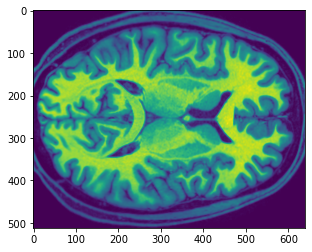

In [45]:
img = nib.load(str(path6)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [51]:
# same as sub-02
path7 = r"/Volumes/myDisk/final/sub-07"
thresh = fsl.Threshold(direction = 'above',out_file = str(path7)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path7)+'/tof.nii.gz'
thresh.inputs.thresh = 130
thresh.run()

In [52]:
flt2f = fsl.FLIRT(out_matrix_file = str(path7)+'/t1_to_t2_to_tof.mat',out_file = str(path7)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path7)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path7)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-53-cf5855e9b805>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path7)+'/t1_to_t2_to_tof.nii.gz').get_data()


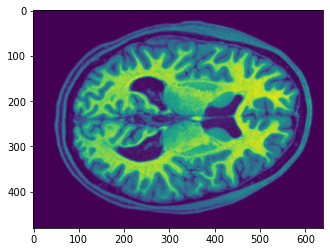

In [53]:
img = nib.load(str(path7)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [54]:
# same as sub-02
path8 = r"/Volumes/myDisk/final/sub-08"
thresh = fsl.Threshold(direction = 'above',out_file = str(path8)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path8)+'/tof.nii.gz'
thresh.inputs.thresh = 170
thresh.run()

In [55]:
flt2f = fsl.FLIRT(out_matrix_file = str(path8)+'/t1_to_t2_to_tof.mat',out_file = str(path8)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path8)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path8)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-56-ac2c1e7b5825>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path8)+'/t1_to_t2_to_tof.nii.gz').get_data()


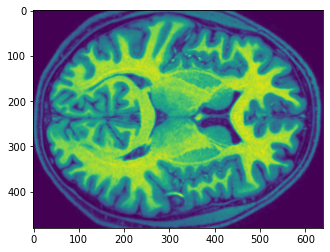

In [56]:
img = nib.load(str(path8)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [57]:
# same as sub-02
path9 = r"/Volumes/myDisk/final/sub-09"
thresh = fsl.Threshold(direction = 'above',out_file = str(path9)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path9)+'/tof.nii.gz'
thresh.inputs.thresh = 200
thresh.run()

In [58]:
flt2f = fsl.FLIRT(out_matrix_file = str(path9)+'/t1_to_t2_to_tof.mat',out_file = str(path9)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path9)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path9)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-59-045266dfa90b>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path9)+'/t1_to_t2_to_tof.nii.gz').get_data()


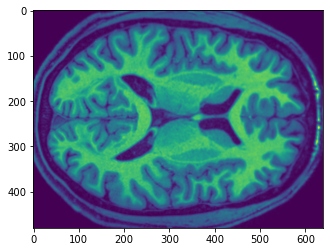

In [59]:
img = nib.load(str(path9)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [60]:
# same as sub-02
path11 = '/Volumes/myDisk/final/sub-11'
thresh = fsl.Threshold(direction = 'above',out_file = str(path11)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path11)+'/tof.nii.gz'
thresh.inputs.thresh = 220
thresh.run()

In [61]:
flt2f = fsl.FLIRT(out_matrix_file = str(path11)+'/t1_to_t2_to_tof.mat',out_file = str(path11)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path11)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path11)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-62-bda13e3e26fd>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path11)+'/t1_to_t2_to_tof.nii.gz').get_data()


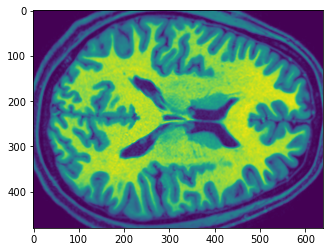

In [62]:
img = nib.load(str(path11)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [65]:
# same as sub-02
path15 = '/Volumes/myDisk/final/sub-15'
thresh = fsl.Threshold(direction = 'above',out_file = str(path15)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path15)+'/tof.nii.gz'
thresh.inputs.thresh = 160
thresh.run()

In [67]:
flt2f = fsl.FLIRT(out_matrix_file = str(path15)+'/t1_to_t2_to_tof.mat',out_file = str(path15)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path15)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path15)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-68-38cdd18db510>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path15)+'/t1_to_t2_to_tof.nii.gz').get_data()


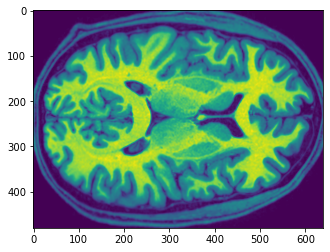

In [68]:
img = nib.load(str(path15)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [69]:
# same as sub-02
path16 = '/Volumes/myDisk/final/sub-16'
thresh = fsl.Threshold(direction = 'above',out_file = str(path16)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path16)+'/tof.nii.gz'
thresh.inputs.thresh = 165
thresh.run()

In [70]:
flt2f = fsl.FLIRT(out_matrix_file = str(path16)+'/t1_to_t2_to_tof.mat',out_file = str(path16)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path16)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path16)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-71-d65b07620a4f>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path16)+'/t1_to_t2_to_tof.nii.gz').get_data()


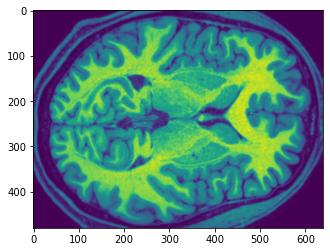

In [71]:
img = nib.load(str(path16)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [72]:
# same as sub-02
path18 = '/Volumes/myDisk/final/sub-18'
thresh = fsl.Threshold(direction = 'above',out_file = str(path18)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path18)+'/tof.nii.gz'
thresh.inputs.thresh = 60
thresh.run()

In [73]:
flt2f = fsl.FLIRT(out_matrix_file = str(path18)+'/t1_to_t2_to_tof.mat',out_file = str(path18)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path18)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path18)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-74-d3b6a2bdee62>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path18)+'/t1_to_t2_to_tof.nii.gz').get_data()


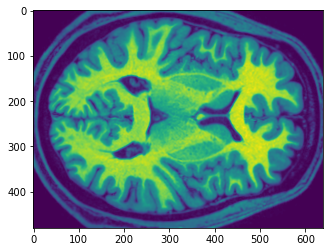

In [74]:
img = nib.load(str(path18)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [75]:
# same as sub-02
path19 = '/Volumes/myDisk/final/sub-19'
thresh = fsl.Threshold(direction = 'above',out_file = str(path19)+'/tof_thresh.nii.gz')
thresh.inputs.in_file = str(path19)+'/tof.nii.gz'
thresh.inputs.thresh = 60
thresh.run()

In [76]:
flt2f = fsl.FLIRT(out_matrix_file = str(path19)+'/t1_to_t2_to_tof.mat',out_file = str(path19)+'/t1_to_t2_to_tof.nii.gz')
flt2f.inputs.in_file = str(path19)+'/t1_to_t2.nii.gz'
flt2f.inputs.reference = str(path19)+'/tof_thresh.nii.gz'
flt2f.inputs.output_type = "NIFTI_GZ"
flt2f.run()

<ipython-input-77-f15e79b62e4e>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path19)+'/t1_to_t2_to_tof.nii.gz').get_data()


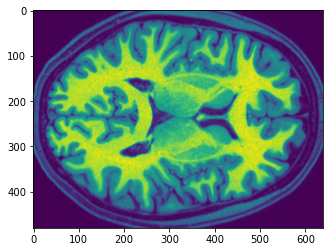

In [77]:
img = nib.load(str(path19)+'/t1_to_t2_to_tof.nii.gz').get_data()
plt.imshow(img[:,:,100])

In [78]:
# define a function to plot the transformed t1
def plott1t2totof(path):
    img = nib.load(str(path)+'/t1_to_t2_to_tof.nii.gz')
    imgdata = img.get_data()
    i,j,k = imgdata.shape
    plt.imshow(np.max(imgdata[:,:,:],axis = 2))

<ipython-input-78-4b4ad628eaaf>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  imgdata = img.get_data()


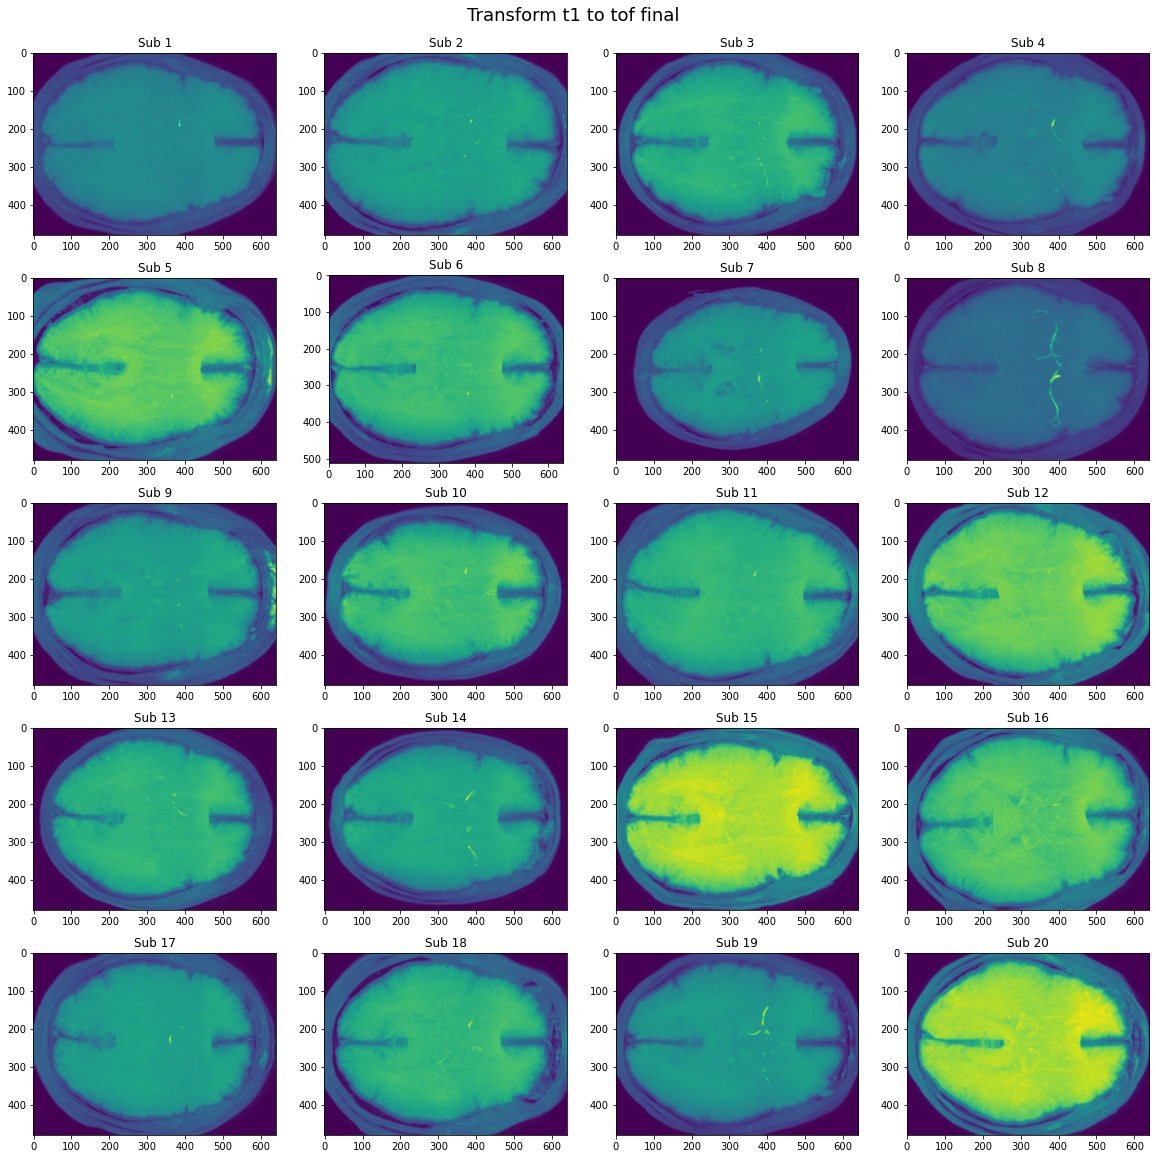

In [79]:
# plot the images
import os
go = os.walk(r"/Volumes/myDisk/final") 
plt.figure(figsize = (20,20))
plt.suptitle('Transform t1 to tof final',fontsize = 18, y=0.91)
plt.tight_layout()
m = 1
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        plt.subplot(5,4,m)
        plott1t2totof(os.path.join(path,dir_name))
        plt.title("Sub {}".format(m))
        m = m+1

Note: We tried to apply an algorithm to find out the suitable threshold, but each image has different situations. The suitable threshold value was between the 24th and the 40th image. A wrong theshold will lead to mistake transformation. Thus, we chose to analyze the image piece by piece.

In [4]:
# brain extraction function
def t1_to_t2_brain(path):    # brain extraction
    btr = fsl.BET(out_file = str(path)+'/t1_to_t2_brain.nii',mask = True)
    btr.inputs.in_file = str(path)+'/t1_to_t2.nii.gz'
    res = btr.run() 

In [5]:
# extract the brain transformed from t1
go = os.walk(r"/Volumes/myDisk/final") 
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        t1_to_t2_brain(os.path.join(path,dir_name))

In [5]:
# transform the t1 brain and the t1 brain mask to tof
def t1_mask_to_tof(path): 
    fslm = fsl.FLIRT(apply_xfm = True,in_matrix_file = str(path)+'/t1_to_t2_to_tof.mat',out_file = str(path)+'/t1_mask_to_tof.nii.gz')
    fslm.inputs.in_file = str(path)+'/t1_to_t2_brain_mask.nii.gz'
    fslm.inputs.reference = str(path)+'/tof.nii.gz'
    fslm.inputs.output_type = "NIFTI_GZ"
    fslm.run()
    
def t1_brain_to_tof(path):
    fslb = fsl.FLIRT(apply_xfm = True,in_matrix_file = str(path)+'/t1_to_t2_to_tof.mat',out_file = str(path)+'/t1_brain_to_tof.nii.gz')
    fslb.inputs.in_file = str(path)+'/t1_to_t2_brain.nii.gz'
    fslb.inputs.reference = str(path)+'/tof.nii.gz'
    fslb.inputs.output_type = "NIFTI_GZ"
    fslb.run()

In [6]:
go = os.walk(r"/Volumes/myDisk/final") 
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        t1_mask_to_tof(os.path.join(path,dir_name))
        t1_brain_to_tof(os.path.join(path,dir_name))

In [7]:
# apply the brain mask to tof
def appplymask(path):    # brain extraction 
    am=fsl.ApplyMask(in_file = str(path)+'/tof.nii.gz',mask_file = str(path)+'/t1_mask_to_tof.nii.gz')
    am.inputs.out_file = str(path)+'/tof_masked.nii.gz'
    am.run()

In [8]:
go = os.walk(r"/Volumes/myDisk/final") 
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        appplymask(os.path.join(path,dir_name))

In [23]:
# plot the masked tof
def plotmasked(path):
    img = nib.load(str(path)+'/tof_masked.nii.gz')
    imgdata = img.get_data()
    i,j,k = imgdata.shape
    plt.imshow(np.max(imgdata[:,:,:],axis = 2))

<ipython-input-23-db87639f2851>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  imgdata = img.get_data()


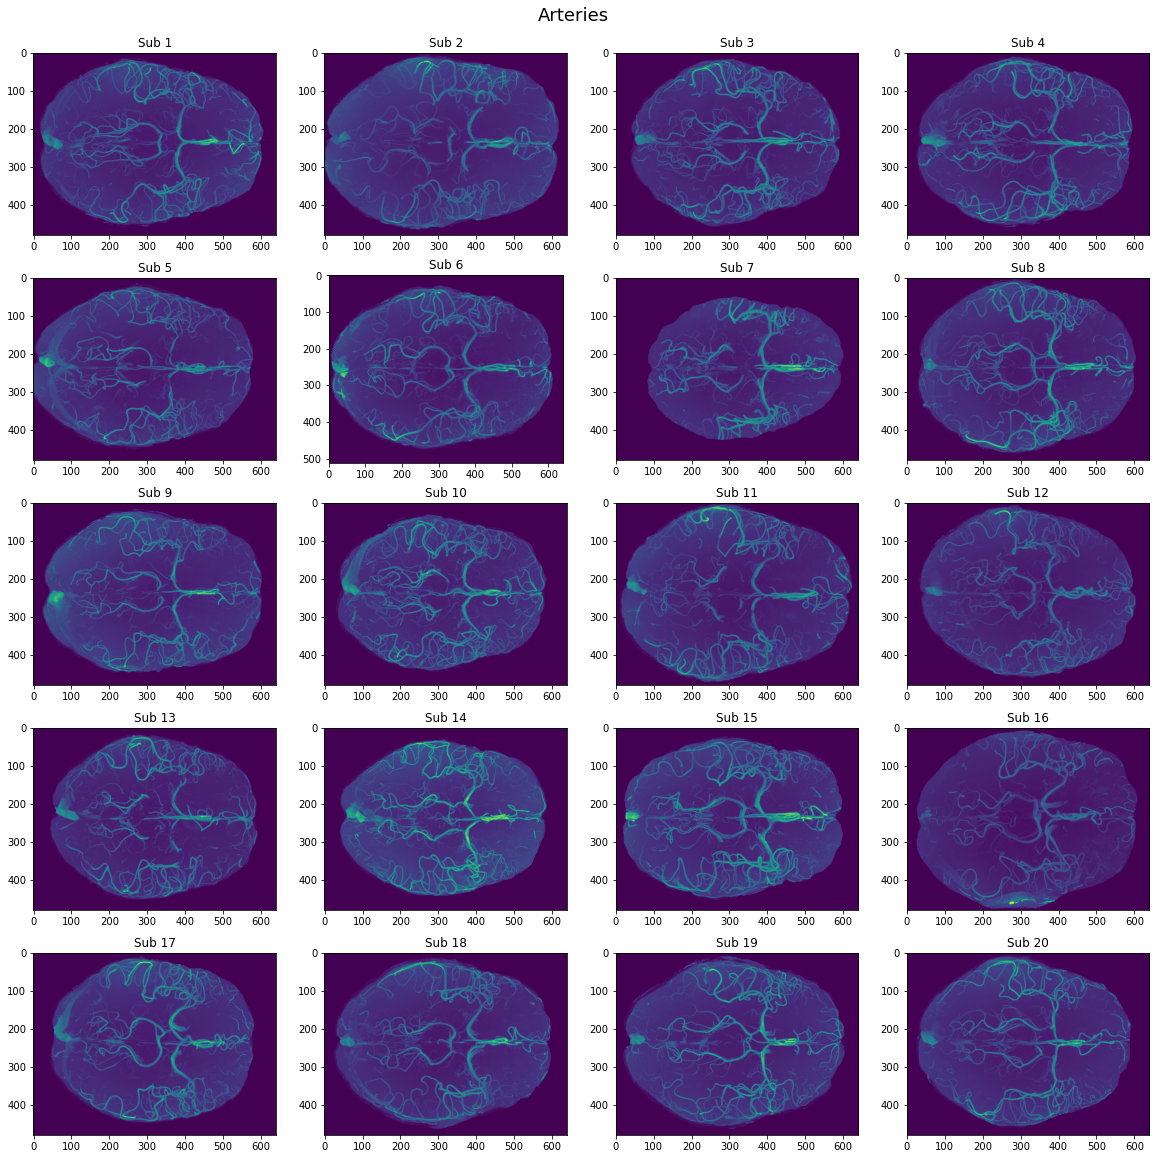

In [24]:
# tof masked results
import os
go = os.walk(r"/Volumes/myDisk/final") 
plt.figure(figsize = (20,20))
plt.suptitle('Arteries',fontsize = 18, y=0.91)
plt.tight_layout()
m = 1
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        plt.subplot(5,4,m)
        plotmasked(os.path.join(path,dir_name))
        plt.title("Sub {}".format(m))
        m = m+1

In [13]:
# find general threshold for each subject
def threshtof(path):
    img = nib.load(str(path)+'/tof_masked.nii.gz').get_data()
    thresh = plt.hist(img.ravel(),bins = 256)[1][54]
    thres = fsl.Threshold(direction = 'below',out_file = str(path)+'/tof_arteries.nii.gz')
    thres.inputs.in_file = str(path)+'/tof_masked.nii.gz'
    thres.inputs.thresh = thresh
    thres.run()

Note: While extracting the arteries, we found the threshold was also important to perform the arteries. Unlike the threshold transformation, a general threshold value filtered low intensity and highlight the arteries, which has no affects to the transformation. Thus,we chose the 55th bin as the threshold value.

<ipython-input-13-c4cbcb555fd6>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(str(path)+'/tof_masked.nii.gz').get_data()


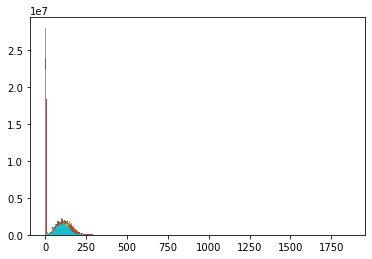

In [14]:
go = os.walk(r"/Volumes/myDisk/final") 
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        threshtof(os.path.join(path,dir_name))

In [15]:
def plotarteries(path):
    img = nib.load(str(path)+'/tof_arteries.nii.gz')
    imgdata = img.get_data()
    plt.imshow(np.max(imgdata[:,:,:],axis = 2))

<ipython-input-15-1faa93cb1184>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  imgdata = img.get_data()


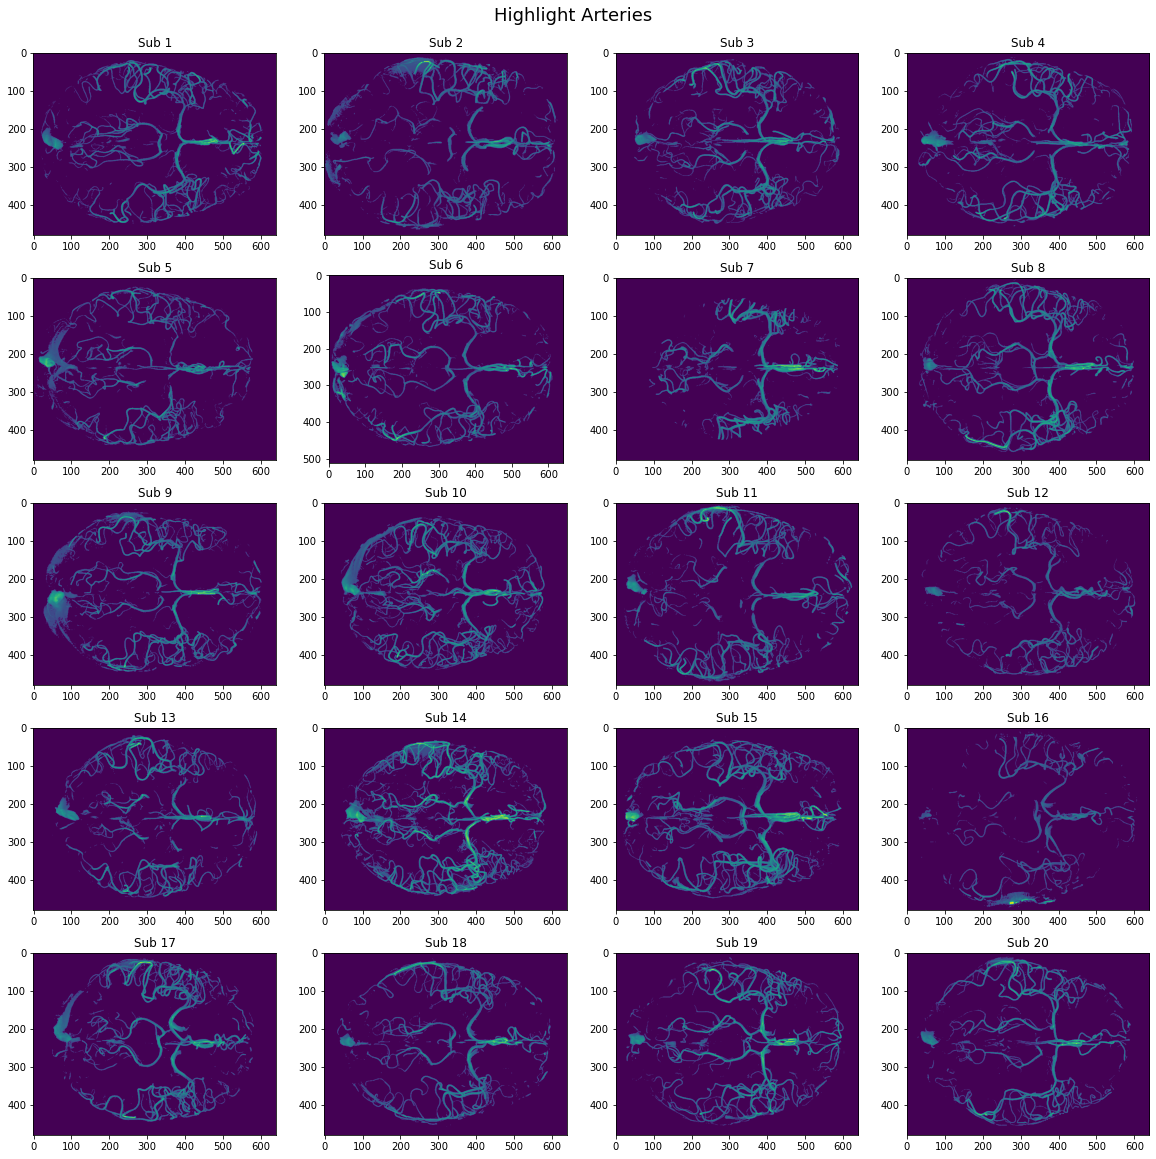

In [16]:
import os
go = os.walk(r"/Volumes/myDisk/final") 
plt.figure(figsize = (20,20))
plt.suptitle('Highlight Arteries',fontsize = 18, y=0.91)
plt.tight_layout()
m = 1
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        plt.subplot(5,4,m)
        plotarteries(os.path.join(path,dir_name))
        plt.title("Sub {}".format(m))
        m = m+1

Note: We did a lot of work in finding out the suitable tof threshold to accomplish the transformation. However, this work cost a lot of energy and time. 

In [23]:
def overlaytof(path):
    combine = fsl.Overlay(out_file = str(path)+'/tof_arteries_overlay.nii.gz')
    combine.inputs.background_image = str(path)+'/t1_to_t2_to_tof.nii.gz'
    combine.inputs.auto_thresh_bg = True
    combine.inputs.stat_image = str(path)+'/tof_arteries.nii.gz'
    combine.inputs.stat_thresh = (100, 2000)
    combine.inputs.show_negative_stats = True
    res = combine.run() 

In [24]:
go = os.walk(r"/Volumes/myDisk/final") 
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        overlaytof(os.path.join(path,dir_name))

In [27]:
# define a function overlaying the t1_to_tof image
def plotoverlay(path):
    img = nib.load(str(path)+'/tof_arteries_overlay.nii.gz')
    imgdata = img.get_data()
    plt.imshow(imgdata[:,:,100])

<ipython-input-27-3bdbe33ff14f>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  imgdata = img.get_data()


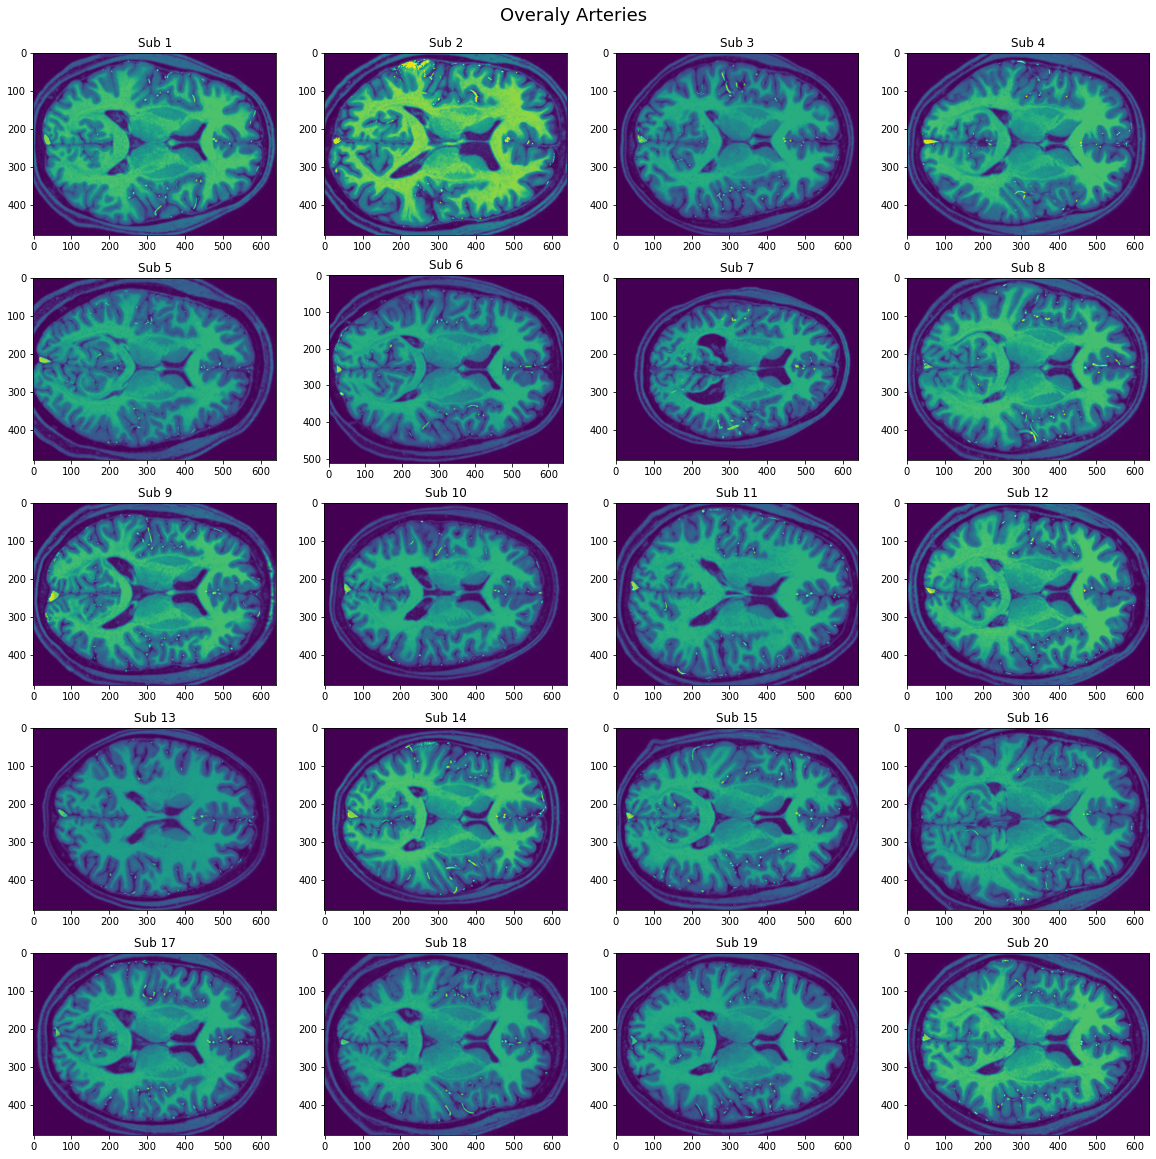

In [28]:
# plot the overlay image
import os
go = os.walk(r"/Volumes/myDisk/final") 
plt.figure(figsize = (20,20))
plt.suptitle('Overaly Arteries',fontsize = 18, y=0.91)
plt.tight_layout()
m = 1
for path,dir_list,file_list in go:  
    for dir_name in dir_list:
        plt.subplot(5,4,m)
        plotoverlay(os.path.join(path,dir_name))
        plt.title("Sub {}".format(m))
        m = m+1

Note: We would like to note that this final project combining most knowledge we learnt in this subject. We appreciate the professor introducing us these useful libraries and methods.